In [9]:
import pandas as pd
df=pd.read_csv("C:\\Users\\HP\\Downloads\\smsspamcollection(1)\\SMSSpamCollection",delimiter='\t',
              header=None)
print(df.head())
#print(df)

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [16]:
print("Number of Spam messages:",df[df[0]=="spam"][0].count())
print("Number of ham messages:",df[df[0]=="ham"][0].count())

Number of Spam messages: 747
Number of ham messages: 4825


In [23]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score


In [28]:
x_train_raw,x_test_raw,y_train,y_test=train_test_split(df.iloc[:,1],df.iloc[:,0],random_state=50)

vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train_raw)
x_test=vectorizer.transform(x_test_raw)
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
print(predictions)

['spam' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [31]:
for i,prediction in enumerate(predictions[:5]):
    print("prediction:%s , Actual:%s, message:%s" %(prediction,y_test[i:i+1],x_test_raw[i:i+1]))

prediction:spam , Actual:3409    spam
Name: 0, dtype: object, message:3409    Do you want a New Nokia 3510i colour phone Del...
Name: 1, dtype: object
prediction:ham , Actual:2103    ham
Name: 0, dtype: object, message:2103    Audrie lousy autocorrect
Name: 1, dtype: object
prediction:ham , Actual:2665    ham
Name: 0, dtype: object, message:2665    He remains a bro amongst bros
Name: 1, dtype: object
prediction:ham , Actual:3239    ham
Name: 0, dtype: object, message:3239    Good. No swimsuit allowed :)
Name: 1, dtype: object
prediction:spam , Actual:1205    spam
Name: 0, dtype: object, message:1205    WIN a year supply of CDs 4 a store of ur choic...
Name: 1, dtype: object


In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test=[0,0,0,0,0,1,1,1,1,1]
y_pred=[0,1,0,0,0,0,0,1,1,1]
con_mat=confusion_matrix(y_pred,y_test)
print(con_mat)


[[4 2]
 [1 3]]


<function matplotlib.pyplot.show(*args, **kw)>

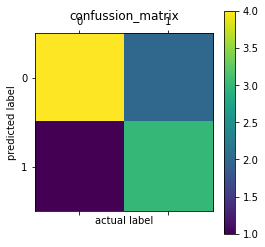

In [34]:
plt.matshow(con_mat)
plt.title("confussion_matrix")
plt.colorbar()
plt.xlabel("actual label")
plt.ylabel("predicted label")
plt.show

In [36]:
from sklearn.metrics import accuracy_score
y_pred,y_true=[0,1,1,0],[1,1,1,1]
print("Accuracy:",accuracy_score(y_true,y_pred))

Accuracy: 0.5


In [37]:
scores=cross_val_score(classifier,x_train,y_train,cv=5)
print(np.mean(scores),scores)

0.9545348537375011 [0.94856459 0.9569378  0.94736842 0.96411483 0.95568862]


In [39]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
classifier.fit(x_train,y_train)
precisions=cross_val_score(classifier,x_train,y_train,cv=5,scoring="precision")
print("precisions",np.mean(precisions),precisions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

precisions 0.9923220023676645 [0.98630137 1.         1.         1.         0.97530864]


In [43]:
recall=cross_val_score(classifier,x_train,y_train,cv=5,scoring="recall")
print("recall",np.mean(recall),recall)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

recall 0.6723874904652938 [0.63157895 0.68421053 0.61403509 0.73913043 0.69298246]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [45]:
F1=cross_val_score(classifier,x_train,y_train,cv=5,scoring="f1")
print("F1 Score",np.mean(F1),F1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

F1 Score 0.8007358902819262 [0.77005348 0.8125     0.76086957 0.85       0.81025641]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [46]:
Accuracy_Score=cross_val_score(classifier,x_train,y_train,cv=5,scoring="accuracy")
print("Accuracy",np.mean(Accuracy_Score),Accuracy_Score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy 0.9545348537375011 [0.94856459 0.9569378  0.94736842 0.96411483 0.95568862]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
